In [1]:
import pandas as pd
import numpy as np
tickers = ['SPY','AAPL.O'] 
data = pd.read_csv('data/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)[tickers]

In [2]:
r = np.log(data / data.shift(1)).values.reshape((-1,2))[1:,:]
r_spy = r[:,0].reshape((-1,1))
r_aapl = r[:,1].reshape((-1,1))

In [3]:
x_data = r_spy
y_data = r_aapl

In [4]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
np.random.seed(0)
tf.set_random_seed(0)

In [5]:
lr = 1e-3
epoch = int(5e4)

In [6]:
x = tf.placeholder(tf.float32, shape=(None,1)) # (5,1)
y = tf.placeholder(tf.float32, shape=(None,1)) # (5,1)

In [7]:
init_b = tf.keras.initializers.zeros()
init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg')

alpha = tf.get_variable('alpha', (), tf.float32, init_b)
beta = tf.get_variable('beta', (1,1), tf.float32, init_w)

In [8]:
y_pred = alpha + x @ beta # (None,1) = () + (None,1) @ (1,1)
loss = tf.nn.l2_loss(y-y_pred)
opt = tf.train.GradientDescentOptimizer(learning_rate=lr)
train = opt.minimize(loss)

In [9]:
init = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess:
    
    sess.run(init)
    
    alpha_trace = []
    beta_trace = []
    loss_trace = []
    
    # train
    feed_dict = {x:x_data, y:y_data}
    for i in range(epoch):
        if i == 0:
            alpha_run, beta_run, loss_run = sess.run([alpha, beta, loss], feed_dict=feed_dict)
        else:
            alpha_run, beta_run, loss_run, _ = sess.run([alpha, beta, loss, train], feed_dict=feed_dict)
        alpha_trace.append(alpha_run)
        beta_trace.append(beta_run[0,0])
        loss_trace.append(loss_run) 
    
    # test
    y_pred_run = sess.run(y_pred, feed_dict=feed_dict)

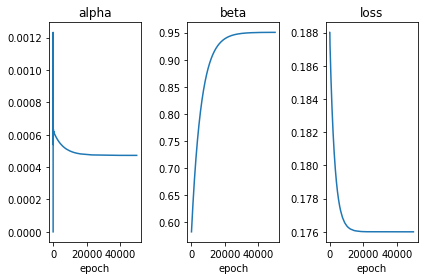

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(alpha_trace)
ax1.set_xlabel('epoch')
ax1.set_title('alpha')
ax2.plot(beta_trace)
ax2.set_xlabel('epoch')
ax2.set_title('beta')
ax3.plot(loss_trace)
ax3.set_xlabel('epoch')
ax3.set_title('loss')
plt.tight_layout()
plt.show()

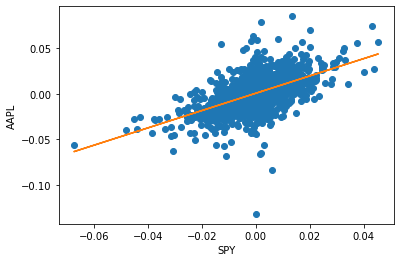

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(x_data.reshape((-1,)), y_data.reshape((-1,)), 'o')
ax.plot(x_data.reshape((-1,)), y_pred_run.reshape((-1,)))
ax.set_xlabel('SPY')
ax.set_ylabel('AAPL')
plt.show()